# K-Nearest Neighbour


K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). A new record is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function. If K = 1, then the case is simply assigned to the class of its nearest neighbor. 

Suppose you want to find out the class of the blue star (BS) in the image below. BS can either be RC or GS. The “K” is KNN algorithm is the nearest neighbor we wish to take the vote from. Let’s say K = 3. Hence, we will now make a circle with BS as the center just as big as to enclose only three datapoints on the plane. The three closest points to BS is all RC. Hence, with a good confidence level, we can say that the BS should belong to the class RC. Here, the choice became very obvious as all three votes from the closest neighbor went to RC. The choice of the parameter K is very crucial in this algorithm.

<img src="img1.png">

The distance functions used for Numeric fields are given below:
<img src="img2.png">

### Libraries useful in K-NN are listed below

### Get The Data. Load data "spambase_data.csv"

In [106]:
import pandas as pd
df = pd.read_csv('spambase_data.csv',header =None)
df.head() # used to display top 5 rows

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### Train and Test Split

In [107]:
X = df[df.columns[:-1]] # Selecting the independent variables
Y=df[df.columns[len(df.columns)-1]] # selecting only the target lableled column

#### Obtain X_train, X_test, Y_train, Y_test by splitting the dataset into 70-30 ratio with a random state value 30.

Note: random_state is used to control the shuffling in the split of the dataset.

This method is called the Hold Out Method.

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state = 30)

### Import the k-NN Classifier library

In [109]:
from sklearn.neighbors import KNeighborsClassifier

### Train 3-NN by using euclidean distance as distance measure

In [110]:
knn=KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

### Prediction and Evaluation

In [111]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [112]:
predictions = knn.predict(X_test)

In [113]:
print(classification_report(Y_test,predictions))
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions))
print("\n Accuracy")
print(accuracy_score(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       863
           1       0.74      0.72      0.73       518

   micro avg       0.80      0.80      0.80      1381
   macro avg       0.79      0.78      0.78      1381
weighted avg       0.80      0.80      0.80      1381

Confusion Matrix
[[730 133]
 [145 373]]

 Accuracy
0.7986965966690803


###  k (5)- fold method for training and testing split and check the difference in performance of 3-NN 

In [114]:
from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')
scores = cross_val_score(knn_cv, X, Y, cv=5, scoring='accuracy')
print('scores: ', scores)
print('mean score: ', scores.mean())

scores:  [0.77090119 0.78610206 0.82410423 0.80631121 0.69423286]
mean score:  0.7763303122995183


#### Q1: Normalize the dataset and apply 3-NN using both euclidean and manhattan distance

In [115]:
from sklearn import preprocessing
#names=df.columns
#df1 = preprocessing.normalize(df, axis=0)
#normal_df = pd.DataFrame(df1,columns=names)
#normal_df.head()

df1=(df-df.min())/(df.max()-df.min())   #using min-max normalization


X1 = df1[df1.columns[:-1]] # Selecting the independent variables
Y1= df1[df1.columns[len(df1.columns)-1]] # selecting only the target lableled column

from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')
scores = cross_val_score(knn_cv, X1, Y1, cv=5, scoring='accuracy')
print('scores: ', scores)
print('mean score: ', scores.mean())

from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors=3, metric = 'manhattan')
scores = cross_val_score(knn_cv, X1, Y1, cv=5, scoring='accuracy')
print('scores: ', scores)
print('mean score: ', scores.mean())


scores:  [0.8534202  0.88707926 0.90662324 0.90424374 0.73884657]
mean score:  0.858042601657138
scores:  [0.86536374 0.90445168 0.90988056 0.89445049 0.7508161 ]
mean score:  0.8649925153503254


#### Q2: Write your observation regarding change in the perfromance of KNN

KNN implemented using Manhattan distance metric gives better mean score than 
the KNN implemented using Euclidean distance metric.
KNN using Manhattan gives mean score:  0.8649925153503254
KNN using Euclidean gives mean score:  0.858042601657138


#### Q3: Find the accuracy of 1-NN model (using euclidean distance)

In [117]:
#### Code here ####

from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')
scores = cross_val_score(knn_cv, X1, Y1, cv=5, scoring='accuracy')
print('scores: ', scores)
print('mean score: ', scores.mean())


scores:  [0.86536374 0.89250814 0.91313789 0.90642002 0.74972797]
mean score:  0.86543155178586


#### Q4: Find the accuracy of the models by taking k from 1 to 20. (Using euclidean distance and k(5)-fold method for train-test split)

In [118]:
#### Code here ###
count=0
kno=[]
kscores=[]
for i in range(1,21):
    knn_cv = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean')
    scores = cross_val_score(knn_cv, X1, Y1, cv=5, scoring='accuracy')
    print('scores: ', scores)
    print('mean score: ', scores.mean())
    kscores.append(scores.mean())
    kno.append(i)
    count=count+1
    


scores:  [0.86536374 0.89250814 0.91313789 0.90642002 0.74972797]
mean score:  0.86543155178586
scores:  [0.84256243 0.88816504 0.91422367 0.88139282 0.78454842]
mean score:  0.8621784761087856
scores:  [0.8534202  0.88707926 0.90662324 0.90424374 0.73884657]
mean score:  0.858042601657138
scores:  [0.85233442 0.88599349 0.90879479 0.89445049 0.77584331]
mean score:  0.8634832980662784
scores:  [0.86536374 0.89142237 0.91205212 0.89880305 0.75408052]
mean score:  0.8643443576847327
scores:  [0.84690554 0.88490771 0.91422367 0.88792165 0.77366703]
mean score:  0.8615251199493382
scores:  [0.86102063 0.88707926 0.91965255 0.90206746 0.76060936]
mean score:  0.8660858531260078
scores:  [0.85559175 0.88273616 0.91205212 0.90206746 0.76605005]
mean score:  0.8636995081515927
scores:  [0.85559175 0.88816504 0.91530945 0.90206746 0.7616975 ]
mean score:  0.8645662388542519
scores:  [0.85233442 0.87947883 0.91313789 0.90533188 0.77040261]
mean score:  0.864137126816076
scores:  [0.85559175 0.8

#### Q5: Plot the graph between k and the accuracy score and find the best value of k

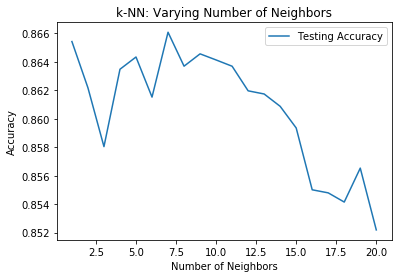

Best value of k  =  7
max score  =  0.8660858531260078


In [119]:
#### Write your answer here ####
import numpy as np
import matplotlib.pyplot as plt
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(kno, kscores, label = 'Testing Accuracy')
#plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
index = kscores.index(max(kscores))+1
print("Best value of k  = ",index)
print("max score  = ",max(kscores))

#### Q6: Find the accuracy of the models by taking k from 1 to 20. (Using manhattan distance  k(5)-fold method for train-test split)

In [120]:
#### Code here ####
kno1=[]
kscores1=[]
for i in range(1,21):
    knn_cv = KNeighborsClassifier(n_neighbors=i, metric = 'manhattan')
    scores = cross_val_score(knn_cv, X1, Y1, cv=5, scoring='accuracy')
    print('scores: ', scores)
    print('mean score: ', scores.mean())
    kscores1.append(scores.mean())
    kno1.append(i)
    
    

scores:  [0.86862106 0.8946797  0.91205212 0.89662677 0.7562568 ]
mean score:  0.8656472892808239
scores:  [0.85016287 0.88816504 0.90119435 0.87377584 0.81501632]
mean score:  0.8656628847623875
scores:  [0.86536374 0.90445168 0.90988056 0.89445049 0.7508161 ]
mean score:  0.8649925153503254
scores:  [0.86102063 0.89033659 0.91096634 0.87704026 0.79325354]
mean score:  0.8665234717904913
scores:  [0.87187839 0.90010858 0.92290988 0.90097933 0.76605005]
mean score:  0.8723852462018504
scores:  [0.85450597 0.89033659 0.9218241  0.89336235 0.78781284]
mean score:  0.8695683714182081
scores:  [0.86753529 0.90119435 0.92725299 0.89989119 0.77366703]
mean score:  0.8739081686060594
scores:  [0.85450597 0.88707926 0.91856678 0.89118607 0.80304679]
mean score:  0.8708769740985043
scores:  [0.86319218 0.89250814 0.92942454 0.9031556  0.79651795]
mean score:  0.876959684498682
scores:  [0.85993485 0.88707926 0.92073833 0.88574538 0.80739935]
mean score:  0.8721794331042452
scores:  [0.86536374 

#### Q7:  Plot the graph between k and the accuracy score and find the best value of k

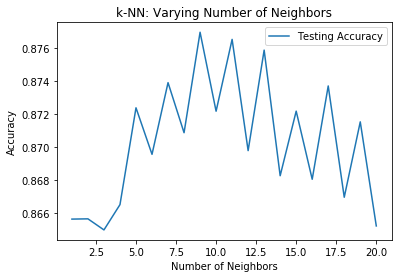

Best value of k  =  9
max score  =  0.876959684498682


In [121]:
#### Write your answer here ####
import numpy as np
import matplotlib.pyplot as plt
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(kno1, kscores1, label = 'Testing Accuracy')
#plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
index = kscores1.index(max(kscores1))+1
print("Best value of k  = ",index)
print("max score  = ",max(kscores1))

#### Q8: Write your observation

In [ ]:
#### Code here ####

KNN gives best vale of K is 9 as gives best accuracy at k=9 when it is using manhattan distance metric and 
KNN gives best vale of K is 7 as gives best accuracy at k=7 when it is using euclidean distance metric.

#### Q9: Implement the weighted k-NN model. Use k(5)-fold method for train-test split

In [127]:
#### Code here ####
from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors=3,weights='distance')
scores = cross_val_score(knn_cv, X1, Y1, cv=5, scoring='accuracy')
print('scores: ', scores)
print('mean score: ', scores.mean())

scores:  [0.86210641 0.89033659 0.90988056 0.90968444 0.74319913]
mean score:  0.8630414260886413


#### Q10: What is the best k value in this model. Take max k =20

In [128]:
#### Write your answer here ####
kno2=[]
kscores2=[]
for i in range(1,21):
    knn_cv = KNeighborsClassifier(n_neighbors=i,weights='distance')
    scores = cross_val_score(knn_cv, X1, Y1, cv=5, scoring='accuracy')
    print('scores: ', scores)
    print('mean score: ', scores.mean())
    kscores2.append(scores.mean())
    kno2.append(i)
    
index = kscores2.index(max(kscores2))+1
print("Best value of k  = ",index)
print("max score  = ",max(kscores2))

scores:  [0.86536374 0.89250814 0.91313789 0.90642002 0.74972797]
mean score:  0.86543155178586
scores:  [0.86536374 0.89250814 0.91313789 0.90642002 0.74972797]
mean score:  0.86543155178586
scores:  [0.86210641 0.89033659 0.90988056 0.90968444 0.74319913]
mean score:  0.8630414260886413
scores:  [0.86319218 0.89359392 0.91639522 0.91730141 0.7562568 ]
mean score:  0.86934790801974
scores:  [0.8762215  0.89250814 0.917481   0.90968444 0.76278564]
mean score:  0.8717361433555568
scores:  [0.87947883 0.89576547 0.9218241  0.914037   0.77040261]
mean score:  0.8763016024357306
scores:  [0.87513572 0.8946797  0.92833876 0.914037   0.77475517]
mean score:  0.8773892691272083
scores:  [0.86970684 0.89685125 0.92508143 0.914037   0.76713819]
mean score:  0.8745629425365579
scores:  [0.87187839 0.89793702 0.92399566 0.91077258 0.77366703]
mean score:  0.8756501366376851
scores:  [0.86862106 0.8946797  0.92508143 0.914037   0.76822633]
mean score:  0.8741291045948778
scores:  [0.86970684 0.892